## https://www.kaggle.com/c/forest-cover-type-prediction/kernels

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("./covtype.data", header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
0     581012 non-null int64
1     581012 non-null int64
2     581012 non-null int64
3     581012 non-null int64
4     581012 non-null int64
5     581012 non-null int64
6     581012 non-null int64
7     581012 non-null int64
8     581012 non-null int64
9     581012 non-null int64
10    581012 non-null int64
11    581012 non-null int64
12    581012 non-null int64
13    581012 non-null int64
14    581012 non-null int64
15    581012 non-null int64
16    581012 non-null int64
17    581012 non-null int64
18    581012 non-null int64
19    581012 non-null int64
20    581012 non-null int64
21    581012 non-null int64
22    581012 non-null int64
23    581012 non-null int64
24    581012 non-null int64
25    581012 non-null int64
26    581012 non-null int64
27    581012 non-null int64
28    581012 non-null int64
29    581012 non-null int64
30    581012 non-null int64
31    581012 non-null

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
print(pd.DataFrame(df.nunique()).T)

     0    1   2    3    4     5    6    7    8     9   10  11  12  13  14  15  \
0  1978  361  67  551  700  5785  207  185  255  5827   2   2   2   2   2   2   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   

   35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  \
0   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   

   54  
0   7  


In [10]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [16]:
df = pd.read_csv("./covtype.data", header=None)

In [17]:
dataset = df.values

In [18]:
X = dataset[:, 0:54]
Y = dataset[:, 54]


In [19]:
Y_encoded = np_utils.to_categorical(Y)
Y_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [21]:
modelpath = "./model/tree.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor="val_loss", 
                               verbose=1, 
                               save_best_only=True)

In [22]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=seed)

In [27]:
model = Sequential()
model.add(Dense(60, input_dim=54, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=500,
                   callbacks=[checkpointer, early_stopping_callback])

Train on 325366 samples, validate on 81342 samples
Epoch 1/500
325366/325366 [==============================] - 4s 11us/step - loss: 8.3189 - acc: 0.4837 - val_loss: 8.2853 - val_acc: 0.4860

Epoch 00001: val_loss improved from inf to 8.28534, saving model to ./model/tree.hdf5
Epoch 2/500
325366/325366 [==============================] - 4s 11us/step - loss: 8.2626 - acc: 0.4874 - val_loss: 8.2853 - val_acc: 0.4860

Epoch 00002: val_loss did not improve from 8.28534
Epoch 3/500
325366/325366 [==============================] - 3s 10us/step - loss: 8.2626 - acc: 0.4874 - val_loss: 8.2853 - val_acc: 0.4860

Epoch 00003: val_loss did not improve from 8.28534
Epoch 4/500
325366/325366 [==============================] - 3s 10us/step - loss: 8.2626 - acc: 0.4874 - val_loss: 8.2853 - val_acc: 0.4860

Epoch 00004: val_loss did not improve from 8.28534
Epoch 5/500
325366/325366 [==============================] - 3s 10us/step - loss: 8.2626 - acc: 0.4874 - val_loss: 8.2853 - val_acc: 0.4860

Epoch

KeyboardInterrupt: 

In [17]:
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

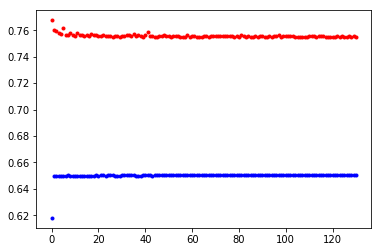

In [19]:
import matplotlib.pyplot as plt
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

In [20]:
print("Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

174304/174304 [==============================] - 4s 23us/step
Accuracy: 0.6506


In [1]:
from sklearn.ensemble import RandomForestClassifier
first_forest = RandomForestClassifier(n_estimators=50, random_state=17, n_jobs=2)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [24]:
%%time
first_forest.fit(X_train, Y_train)

CPU times: user 4min 32s, sys: 460 ms, total: 4min 32s
Wall time: 2min 18s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
forest_val_pred = first_forest.predict(X_test)

In [27]:
accuracy_score(Y_test, forest_val_pred)

0.9426404442812557